In [1]:
#Name: Domala Vamshikrishna
#Date:01-08-2022
#Model: Support Vector Machine
#station:51000
#Hyperparameter tuning using Randomsearch
#Wave height Prediction

In [2]:
import csv
import numpy as np
import folium
import pandas as pd
import math
from matplotlib import pyplot as plt

In [3]:
#sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#min_samples_split: Defines the minimum no. of samples which are required in a node to be considered for splitting

#min_samples_leaf: Defines the minimum samples required in a terminal node or leaf

#min_weight_leaf: Similar to min_samples_leaf but defined as a fraction
#of the total number of observations instead of an integer.
#Only one of #2 and #3 should be defined.

#max_depth: The maximum depth of a tree. Should be tuned using CV.

#max_leaf_nodes: The maximum number of terminal nodes or leaves in a tree.
#If this is defined, GBM will ignore max_depth.

#max_features:
#The number of features to consider while searching for a best split. These will be randomly selected.
#As a thumb-rule, square root of the total number of features works great but we should check upto 
#30-40% of the total number of features.
#Higher values can lead to over-fitting but depends on case to case


In [4]:
train = pd.read_excel("51000_Training.xlsx")

In [5]:
train

,Date,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP
0,2016-01-01 00:00:00,253,1.9,3.4,3.17,13.79,9.94,304,1016.3,23.3,24.8
1,2016-01-01 01:00:00,286,1.6,2.9,3.12,14.81,9.91,305,1016.7,23.4,24.8
2,2016-01-01 02:00:00,277,3.3,4.8,3.21,14.81,10.41,314,1017.0,23.4,24.7
3,2016-01-01 03:00:00,270,2.7,4.2,2.80,14.81,9.36,308,1017.4,23.0,24.6
4,2016-01-01 04:00:00,282,3.0,4.9,3.05,14.81,10.16,315,1018.0,23.0,24.5
...,...,...,...,...,...,...,...,...,...,...,...
43843,2020-12-31 19:00:00,75,6.4,8.9,3.39,14.81,8.17,308,1023.4,23.3,24.6
43844,2020-12-31 20:00:00,82,7.2,10.3,3.18,14.81,8.15,291,1023.3,22.9,24.7
43845,2020-12-31 21:00:00,68,7.3,9.1,3.03,14.81,8.16,289,1022.7,23.3,24.7
43846,2020-12-31 22:00:00,51,7.9,9.7,3.19,14.81,8.31,285,1021.4,23.2,24.7


In [6]:
Xtrain = train.iloc[:,[2,3,5,6,7]]
ytrain = train.iloc[:,4]

In [7]:
from sklearn.svm import SVR


In [8]:
from sklearn.model_selection import RandomizedSearchCV
random_grid=[{'kernel': ['rbf','poly','sigmoid','linear'],'degree':[1,2,3], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'C': [0.1, 10, 100, 1000]}]

In [9]:
random_search=RandomizedSearchCV(SVR(), random_grid, cv=5, n_jobs=4)

In [10]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [11]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search=random_search.fit(Xtrain,ytrain.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 13 hours 16 minutes and 20.45 seconds.


In [12]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'degree': 3, 'C': 1000}

In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor as gtb
#greg=SVR(C=100, epsilon=0.01, gamma=0.0001)
#greg=SVR(C=100, epsilon=0.01, gamma=0.0001)
#greg=SVR(C=1000, epsilon=0.01, gamma=0.001) #good
greg=SVR(C=1000, kernel='rbf', gamma=0.001, degree=3)
greg.fit(Xtrain,ytrain)



In [13]:
y_pred = greg.predict(Xtrain)

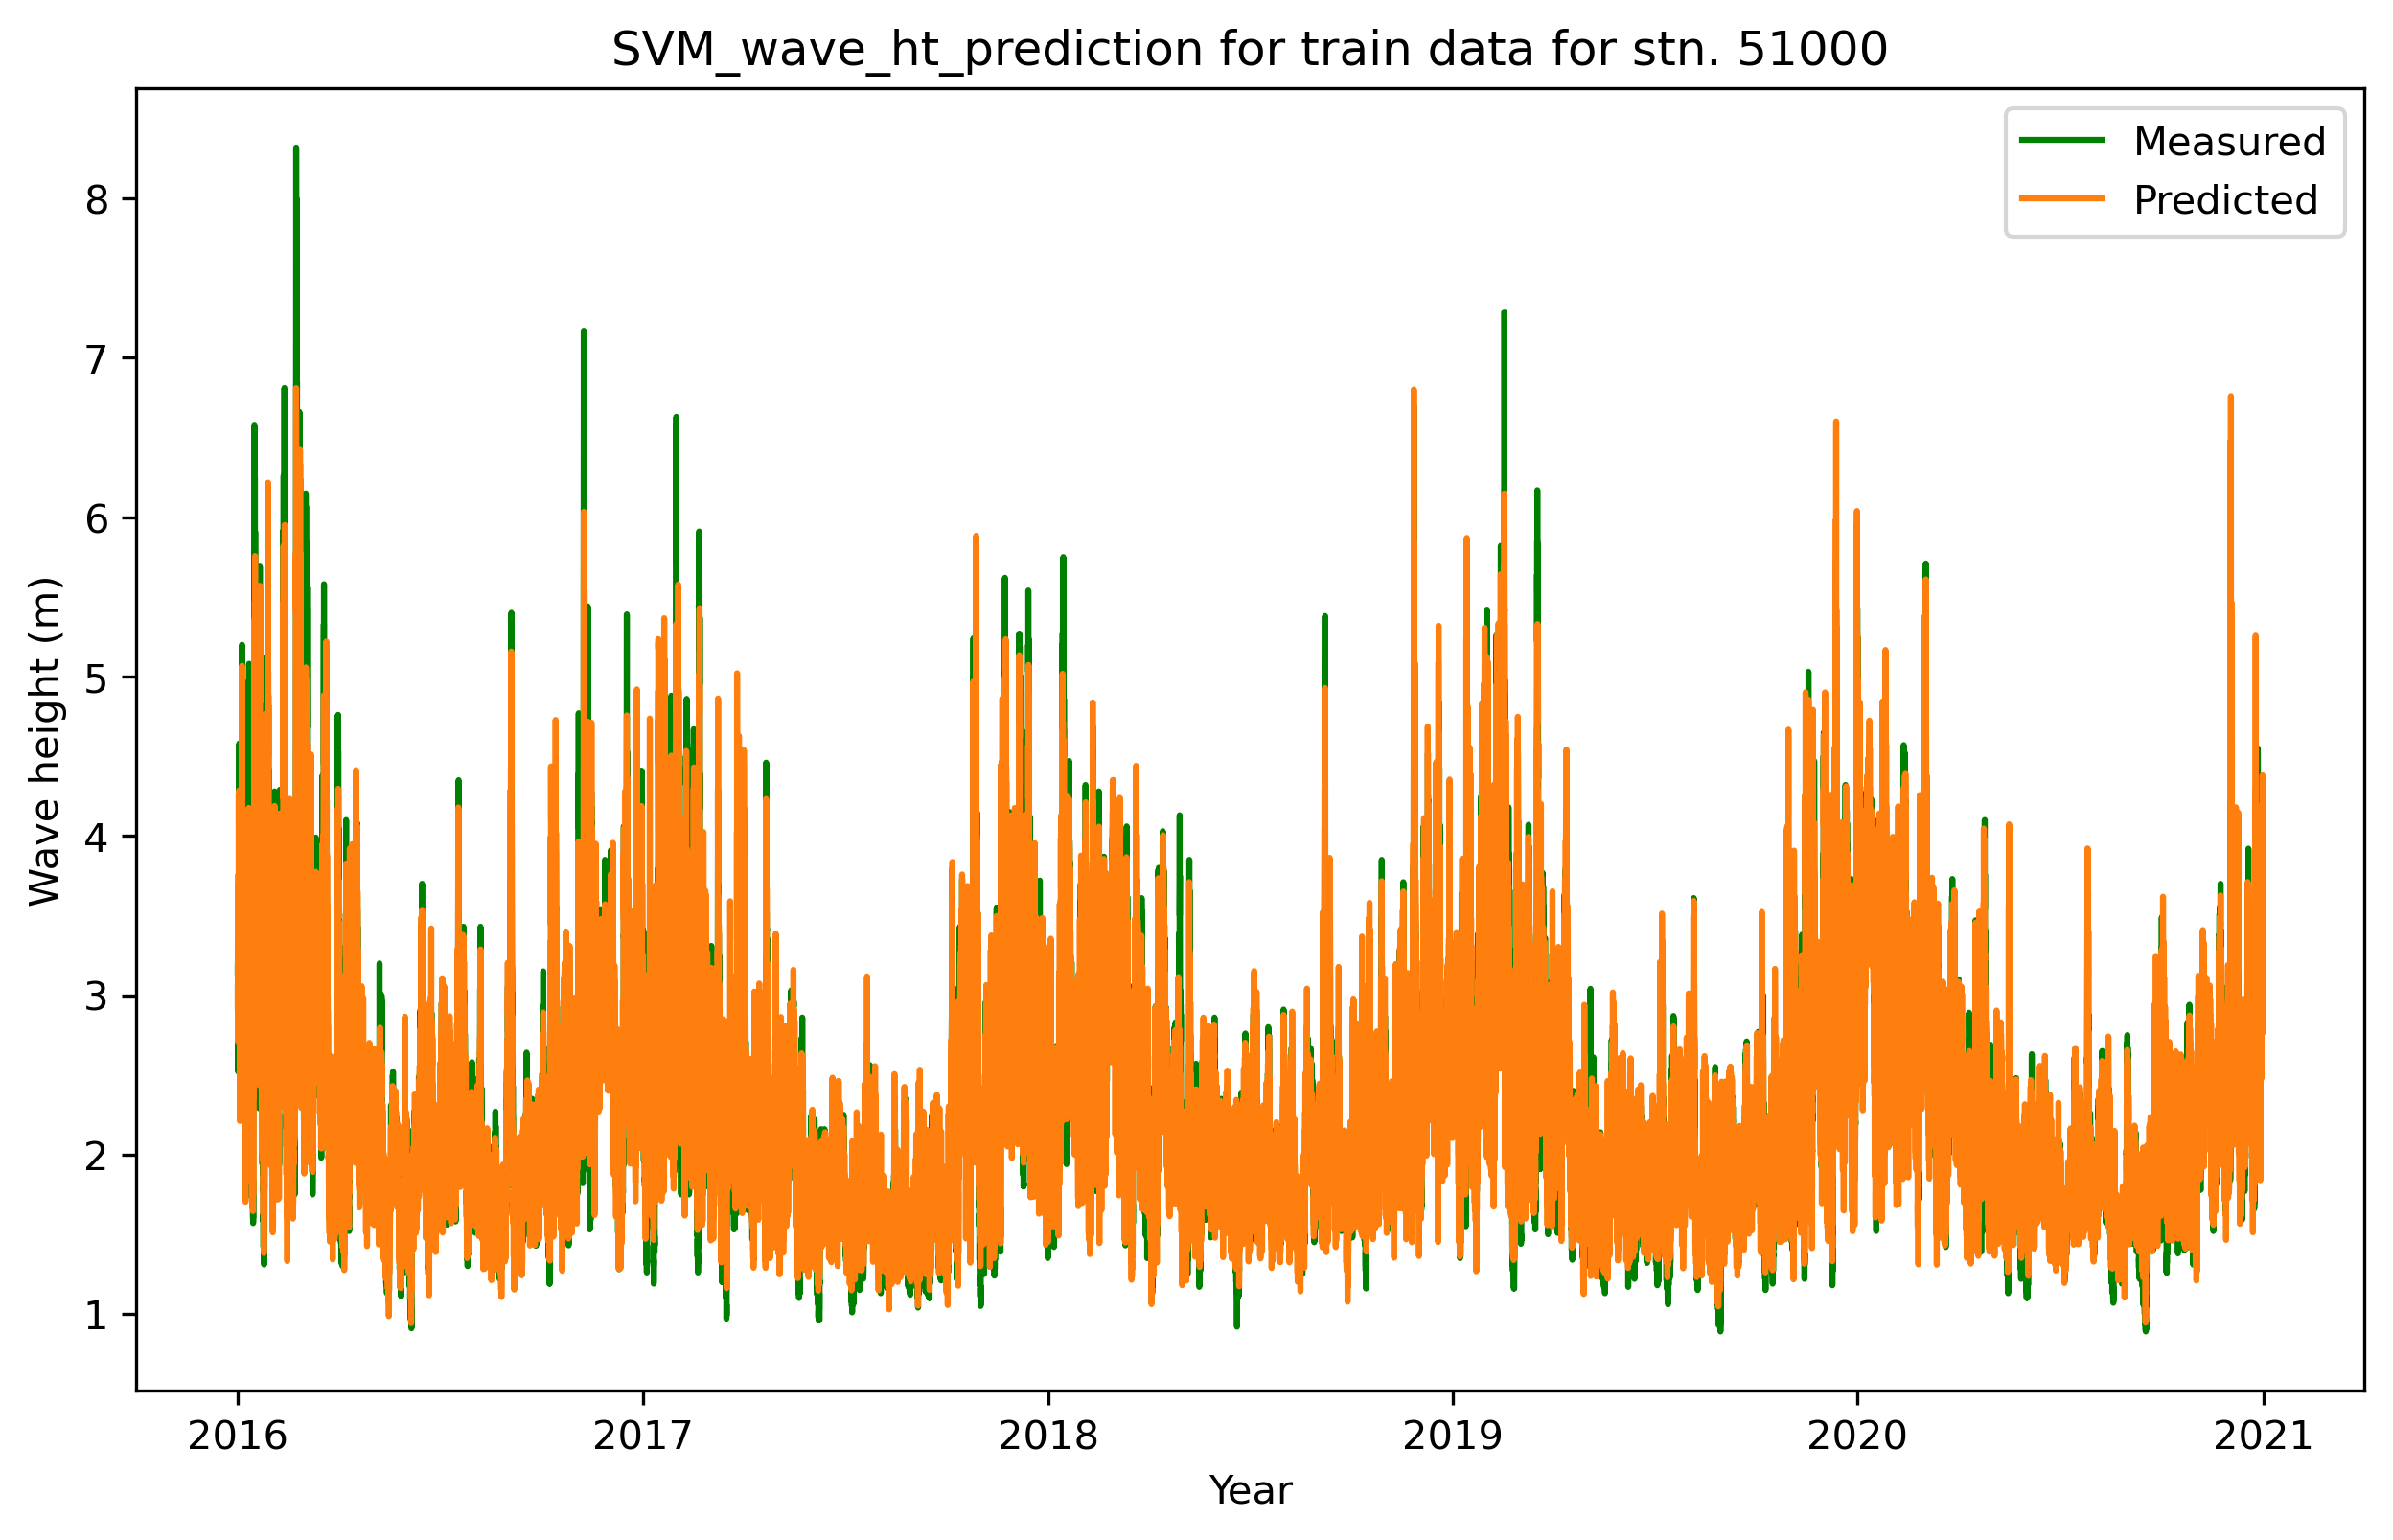

In [14]:
fig = plt.figure(figsize=(10, 6), dpi=300)
plt.plot(train['Date'], ytrain.ravel(), label='Measured', color='green')
plt.plot(train['Date'],y_pred, label='Predicted', color='C1')
#plt.plot(y_pred, color='green', label='predicted')
plt.title('SVM_wave_ht_prediction for train data for stn. 51000')
plt.xlabel('Year')
plt.ylabel('Wave height (m)')
plt.legend(loc='upper right')
plt.savefig('SVM_Train.jpeg', bbox_inches='tight')
plt.savefig('SVM_Train-tiff.tiff', bbox_inches='tight')

In [15]:
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred)

0.8453111712037766

In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,y_pred))

0.3062205711069284

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytrain,y_pred)

0.09436864404976081

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytrain,y_pred)

0.21135068587919054

In [19]:
test=pd.read_excel("51000_Testing.xlsx")

In [20]:
test

,Date,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP
0,2021-01-01 00:00:00,67,6.7,9.6,3.06,17.39,8.29,328,1019.4,21.8,24.7
1,2021-01-01 01:00:00,71,7.4,9.5,2.92,19.05,8.35,298,1019.7,23.1,24.7
2,2021-01-01 02:00:00,63,7.7,9.6,3.07,17.39,8.31,336,1020.2,23.1,24.7
3,2021-01-01 03:00:00,48,7.6,10.0,3.30,16.00,8.85,320,1021.3,23.2,24.7
4,2021-01-01 04:00:00,57,8.1,10.1,3.38,17.39,9.08,321,1022.0,22.8,24.7
...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,99,10.3,13.8,3.02,9.09,6.56,62,1015.0,22.7,23.4
8756,2021-12-31 20:00:00,100,11.1,14.2,2.96,7.14,6.45,86,1014.9,22.8,23.4
8757,2021-12-31 21:00:00,104,11.1,13.9,2.92,10.00,6.41,46,1014.1,22.8,23.4
8758,2021-12-31 22:00:00,109,11.3,14.1,2.89,8.33,6.31,78,1013.1,22.8,23.4


In [21]:
Xtest=test.iloc[:,[2,3,5,6,7]]

In [22]:
Xtest

,WSPD,GST,DPD,APD,MWD
0,6.7,9.6,17.39,8.29,328
1,7.4,9.5,19.05,8.35,298
2,7.7,9.6,17.39,8.31,336
3,7.6,10.0,16.00,8.85,320
4,8.1,10.1,17.39,9.08,321
...,...,...,...,...,...
8755,10.3,13.8,9.09,6.56,62
8756,11.1,14.2,7.14,6.45,86
8757,11.1,13.9,10.00,6.41,46
8758,11.3,14.1,8.33,6.31,78


In [23]:
ytest=test.iloc[:,[4]]

In [24]:
ytest

,WVHT
0,3.06
1,2.92
2,3.07
3,3.30
4,3.38
...,...
8755,3.02
8756,2.96
8757,2.92
8758,2.89


In [25]:
ytest_pred=greg.predict(Xtest)

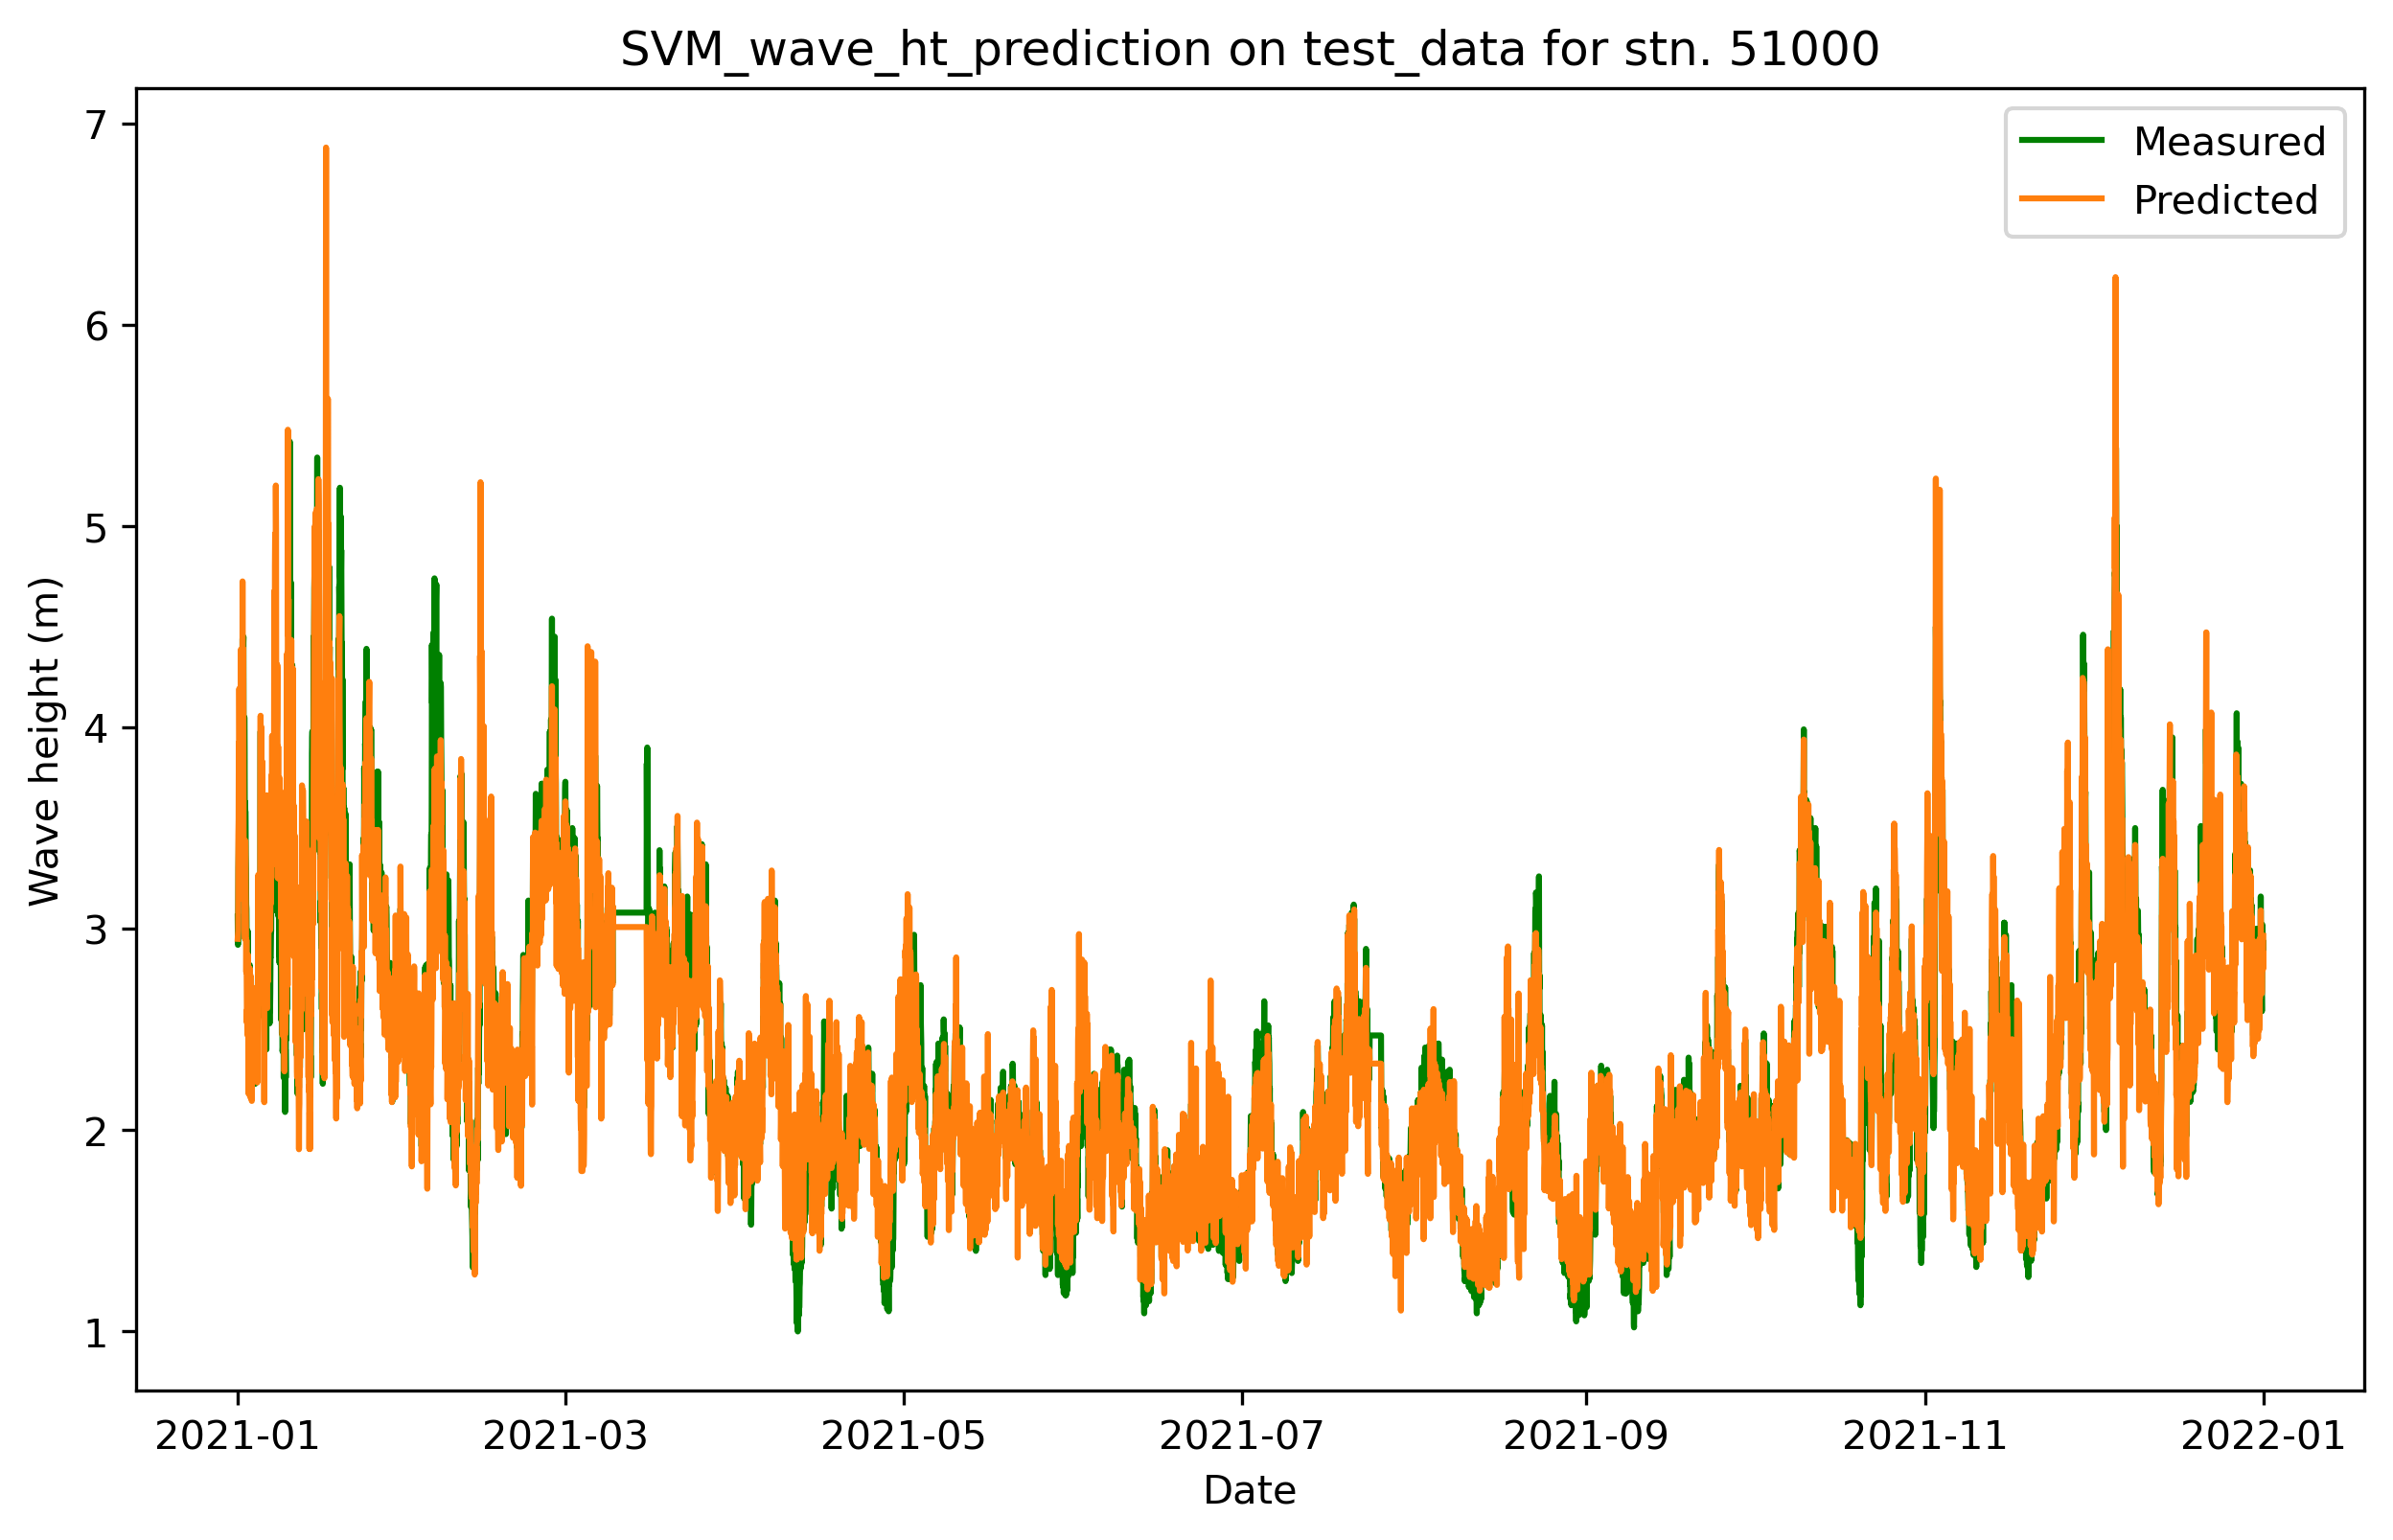

In [26]:
fig = plt.figure(figsize=(10, 6), dpi=300)
plt.plot(test['Date'], ytest, label='Measured', color='green')
plt.plot(test['Date'],ytest_pred, label='Predicted', color='C1')

#plt.plot(y_pred, color='green', label='predicted')
plt.title('SVM_wave_ht_prediction on test_data for stn. 51000')
plt.xlabel('Date')
plt.ylabel('Wave height (m)')
plt.legend(loc='upper right')
plt.savefig('SVM_Test.jpeg', bbox_inches='tight')
plt.savefig('SVM_Test-tiff.tiff', bbox_inches='tight')

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ytest_pred)

0.8562477619711535

In [28]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ytest_pred)

0.06873737492181231

In [29]:
math.sqrt(mean_squared_error(ytest,ytest_pred))

0.262178135857688

In [30]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest,ytest_pred)

0.08574154581030176

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ytest_pred)

0.1874804811177215

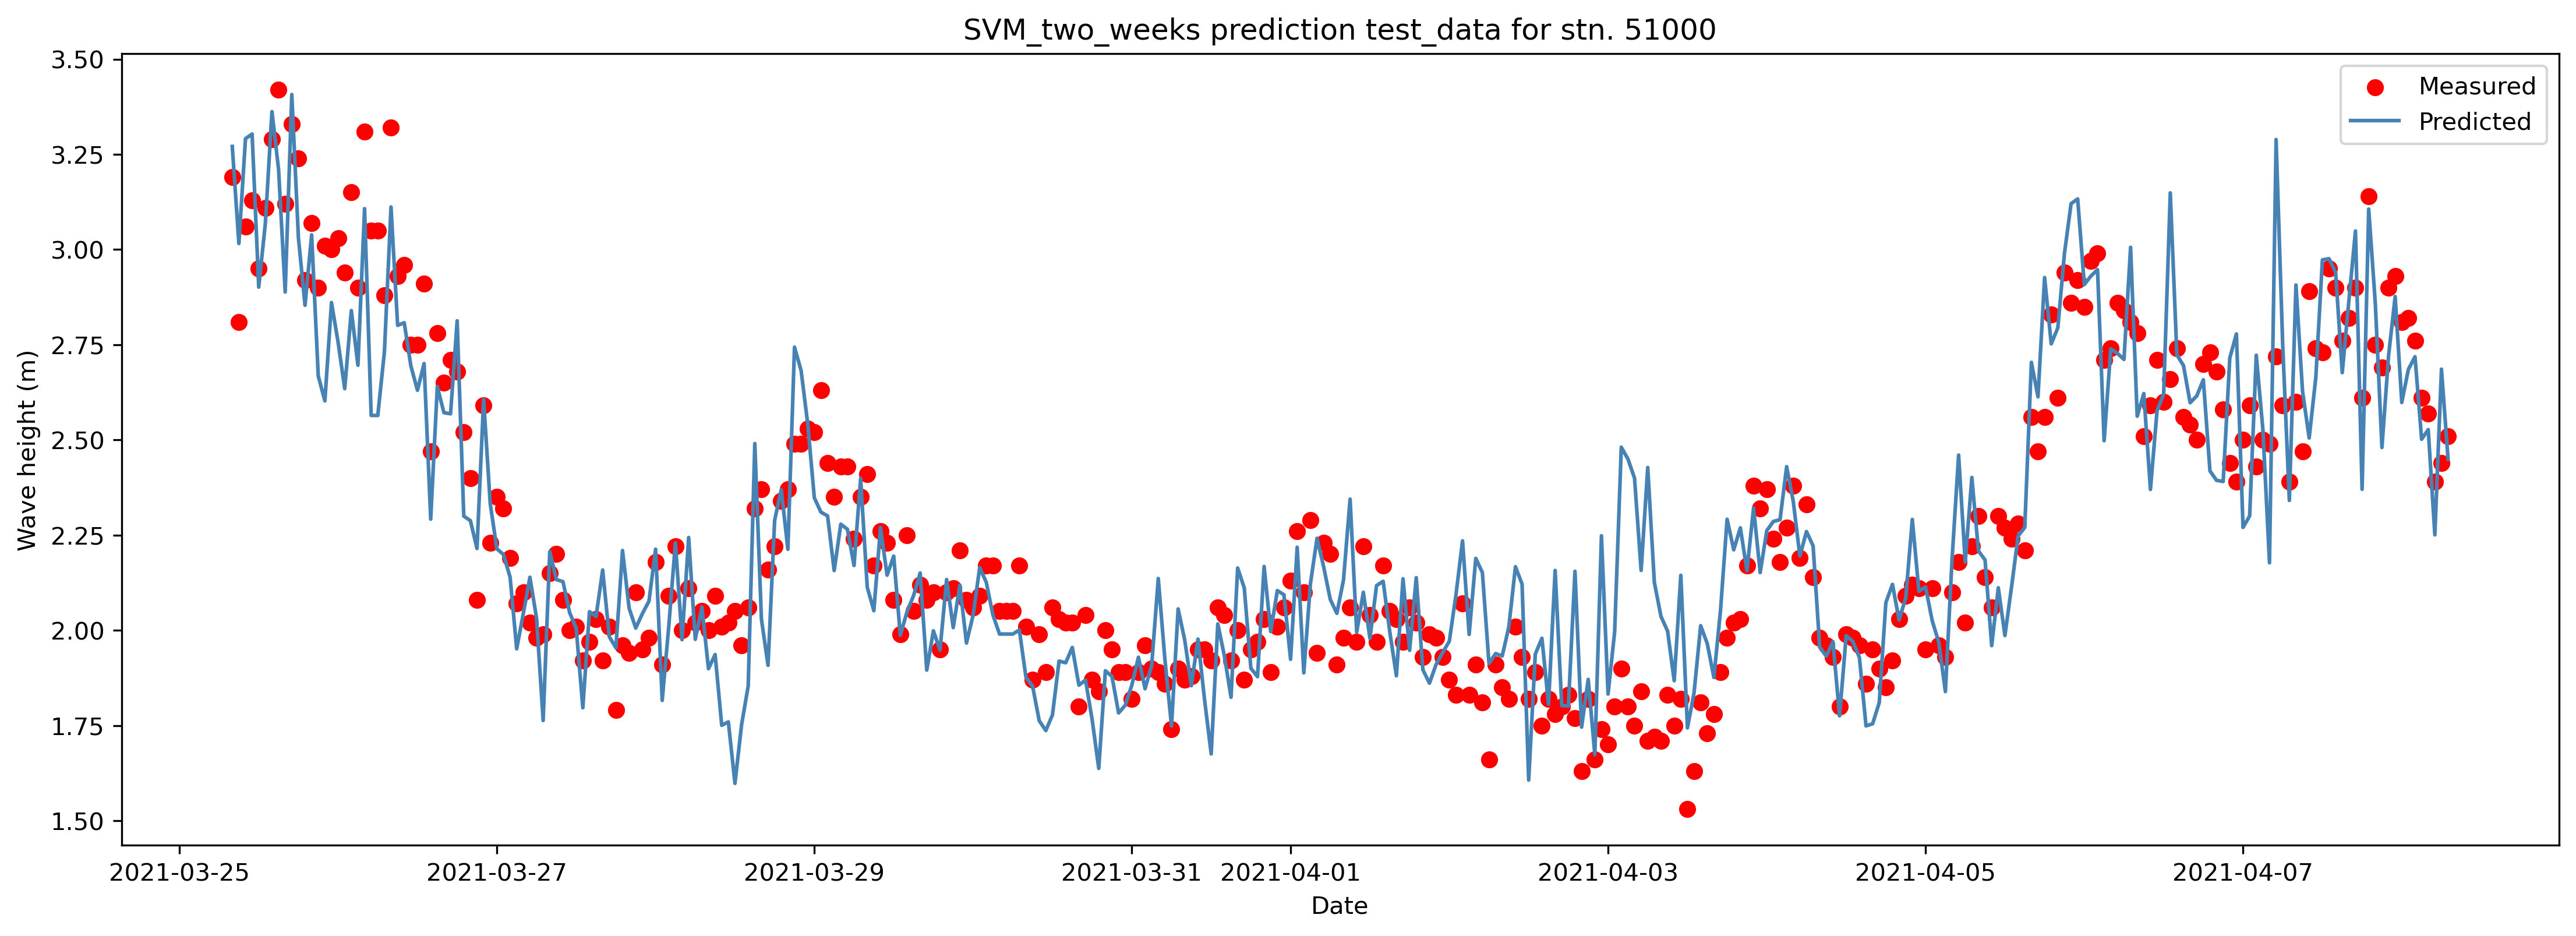

In [32]:
fig = plt.figure(figsize=(18, 6), dpi=300)

plt.scatter(test['Date'][2000:2336],ytest[2000:2336], label='Measured', color='red')
plt.plot(test['Date'][2000:2336],ytest_pred[2000:2336], label='Predicted', color='steelblue')
plt.title('SVM_two_weeks prediction test_data for stn. 51000')
plt.xlabel('Date')
plt.ylabel('Wave height (m)')
plt.legend(loc='upper right')
plt.savefig('SVM_twoweek.jpeg', bbox_inches='tight')
plt.savefig('SVM_twoweek-tiff.tiff', bbox_inches='tight')

In [33]:
ytest_pred=pd.DataFrame(ytest_pred)

In [34]:
ytest_pred

,0
0,2.949633
1,2.972478
2,2.989295
3,3.462022
4,3.544595
...,...
8755,2.895275
8756,2.864639
8757,2.888593
8758,2.798628


In [35]:
ytest_pred.to_excel("Wave_ht_SVM_51000.xlsx")